# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Nurcahyo Dharmajati
- **Email:** AhmadND00@protonmail.com
- **ID Dicoding:** ahmadnd00

## Menentukan Pertanyaan Bisnis

1. Pada jam berapa puncak rental sepeda terjadi?
2. Bagaimana pengaruh musim terhadap rental sepeda?
3. Apakah faktor cuaca berpengaruh terhadap rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [104]:
import matplotlib.pyplot as plt
import mplcyberpunk # Matplotlib Theme
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("cyberpunk")


## Data Wrangling

### Gathering Data
Membaca day.csv and hour.csv dengan DataFrame

In [105]:
df_day = pd.read_csv("data/day.csv")

# Tampilkan 5 data pertama dari df_day
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [106]:
df_hour = pd.read_csv("data/hour.csv")

# Tampilkan 5 data terakhir dari df_hour
df_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Informasi yang didapat
- Data diambil pada tanggal 2011-01-01 - 2012-12-31 (selama dua tahun)
- `df_day` dan `df_hour` hampir memiliki kolom yang sama, hanya saja kolom df_hour menampilkan data rangka dalam perjam

### Assessing Data

#### df_hour

In [107]:
print(df_day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [108]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [109]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### df_hour

print(df_hour.columns)

In [110]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [111]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [112]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Cleaning Data

#### Mengubah Penamaan Kolom di Dataframe

Untuk mempermudah pemrosesan data, kita dapat mengubah penamaan kolom agar untuk lebih memperjelas

In [113]:
df_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month'}, inplace=True)

df_hour.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour'}, inplace=True)

#### Mengubah Penamaan Kolom

Mengubah penamaan musim agar lebih memperjelas

In [114]:
seasonal_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4:'Winter'}
df_day['season'] = df_day['season'].replace(seasonal_name)
df_hour['season'] = df_hour['season'].replace(seasonal_name)

#### Cek Data Duplikat

In [115]:
print("Duplikasi Data di df_day: ", df_day.duplicated().sum())
print("Duplikasi Data di df_hour: ", df_hour.duplicated().sum())

Duplikasi Data di df_day:  0
Duplikasi Data di df_hour:  0


#### Cek Missing/Nan Data

In [116]:
print(f"Duplikasi Data di df_day:\n{df_day.isnull().sum()}")
print("")
print(f"Duplikasi Data di df_hour:\n{df_hour.isnull().sum()}")

Duplikasi Data di df_day:
instant       0
date          0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplikasi Data di df_hour:
instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Karena tidak ada data duplikat dan missing value, maka tidak perlu dilakukan penghapusan data

#### Fix Datetime

Mengubah tipe data dteday ke datetime

In [117]:
df_day['date'] = pd.to_datetime(df_day['date'])
df_hour["date"] = pd.to_datetime(df_hour["date"])

Ubah penamaan bulan dari angka menjadi nama lengkap bulan agar lebih jelas

In [118]:
df_day['month'] = pd.to_datetime(df_day['month'], format='%m').dt.month_name()
df_hour['month'] = pd.to_datetime(df_hour['month'], format='%m').dt.month_name()

## Exploratory Data Analysis (EDA)

### Explore `df_day`

Rental berdasarkan bulan

In [119]:
df_day.groupby(by=df_day['date'].dt.month).agg({
    'cnt': 'mean' ,
    'casual': 'mean',
    'registered': 'mean'
})

,cnt,casual,registered
date,,,
1,2176.338710,194.225806,1982.112903
2,2655.298246,262.508772,2392.789474
3,3692.258065,716.838710,2975.419355
4,4484.900000,1013.366667,3471.533333
5,5349.774194,1214.274194,4135.500000
6,5772.366667,1231.766667,4540.600000
7,5563.677419,1260.596774,4303.080645
8,5664.419355,1161.919355,4502.500000
9,5766.516667,1172.050000,4594.466667


Rental berdasarkan musim

In [120]:
# Cek jangka tanggal permusim
df_day.query("year == 0").groupby(by='season').agg({
    'date': ['min', 'max',]
    })

date           
              min        max
season                      
Fall   2011-06-21 2011-09-22
Spring 2011-01-01 2011-12-31
Summer 2011-03-21 2011-06-20
Winter 2011-09-23 2011-12-20

In [121]:
df_day.groupby(by=df_day['season']).agg({
    'temp': ['min', 'max', 'mean'] ,
    'hum': ['min', 'max', 'mean'],
    'windspeed': ['min', 'max', 'mean'],
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
})

temp                           hum                     windspeed  \
             min       max      mean       min       max      mean       min   
season                                                                         
Fall    0.469167  0.861667  0.706309  0.360000  0.939565  0.633482  0.064071   
Spring  0.059130  0.572500  0.297748  0.000000  0.948261  0.582903  0.045408   
Summer  0.253043  0.808333  0.544405  0.254167  0.922500  0.626948  0.065929   
Winter  0.220833  0.657500  0.422906  0.333478  0.972500  0.668719  0.022392   

                                 casual   registered          cnt  
             max      mean         mean         mean         mean  
season                                                             
Fall    0.375617  0.172095  1202.611702  4441.691489  5644.303191  
Spring  0.507463  0.214537   334.928177  2269.204420  2604.132597  
Summer  0.388067  0.203507  1106.097826  3886.233696  4992.331522  
Winter  0.422275  0.171995   729.112360  3999.050562  4728.162921

In [122]:
df_day.groupby(by=df_day['month']).agg({
    'temp': ['min', 'max', 'mean'] ,
    'hum': ['min', 'max', 'mean'],
    'windspeed': ['min', 'max', 'mean'],
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
})

temp                           hum                      \
                min       max      mean       min       max      mean   
month                                                                   
April      0.300000  0.664167  0.469999  0.254167  0.888333  0.588063   
August     0.635833  0.793333  0.708582  0.415000  0.850000  0.637730   
December   0.215833  0.475833  0.324031  0.441250  0.970417  0.666041   
February   0.127500  0.521667  0.299226  0.187917  0.929167  0.567465   
January    0.059130  0.425000  0.236444  0.311250  0.911250  0.585828   
July       0.595833  0.861667  0.755470  0.396250  0.865417  0.597876   
June       0.540833  0.834167  0.684097  0.305000  0.833333  0.575806   
March      0.198333  0.601667  0.390539  0.000000  0.948261  0.588475   
May        0.414167  0.775000  0.594798  0.360417  0.922500  0.688958   
November   0.245833  0.530000  0.369220  0.333478  0.962500  0.624876   
October    0.254167  0.657500  0.485012  0.463333  0.906250  0.693761   
September  0.469167  0.753333  0.616485  0.467083  0.972500  0.714714   

          windspeed                           casual   registered          cnt  
                min       max      mean         mean         mean         mean  
month                                                                           
April      0.065929  0.388067  0.234482  1013.366667  3471.533333  4484.900000  
August     0.070283  0.375617  0.172918  1161.919355  4502.500000  5664.419355  
December   0.047275  0.407346  0.176609   349.887097  3053.919355  3403.806452  
February   0.045408  0.507463  0.215684   262.508772  2392.789474  2655.298246  
January    0.073396  0.415429  0.206303   194.225806  1982.112903  2176.338710  
July       0.080850  0.284813  0.166059  1260.596774  4303.080645  5563.677419  
June       0.077125  0.347642  0.185420  1231.766667  4540.600000  5772.366667  
March      0.089558  0.441563  0.222699   716.838710  2975.419355  3692.258065  
May        0.074637  0.342667  0.182989  1214.274194  4135.500000  5349.774194  
November   0.046650  0.376871  0.183801   610.050000  3637.133333  4247.183333  
October    0.022392  0.422275  0.175205   963.870968  4235.354839  5199.225806  
September  0.050379  0.357587  0.165945  1172.050000  4594.466667  5766.516667

#### Explore `df_hour`

In [123]:
df_hour.groupby(by=['hour']).agg({
    'cnt': 'mean' ,
    'casual': 'mean',
    'registered': 'mean'
})

,cnt,casual,registered
hour,,,
0,53.898072,10.158402,43.739669
1,33.375691,6.504144,26.871547
2,22.869930,4.772028,18.097902
3,11.727403,2.715925,9.011478
4,6.352941,1.253945,5.098996
5,19.889819,1.411437,18.478382
6,76.044138,4.161379,71.882759
7,212.064649,11.055021,201.009629
8,359.011004,21.679505,337.331499


In [124]:
df_day.to_csv("processed_df_day.csv", index=False)
df_hour.to_csv("processed_df_hour.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<BarContainer object of 17379 artists>

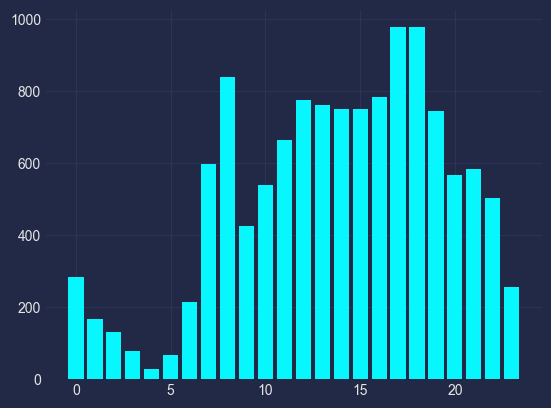

In [125]:
plt.bar(x=df_hour['hour'], height=df_hour['cnt'])

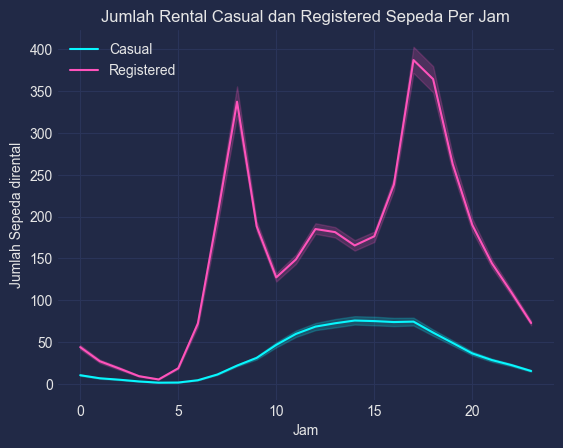

In [126]:
sns.lineplot(data=df_hour, x='hour', y='casual', label='Casual')
sns.lineplot(data=df_hour, x='hour', y='registered', label='Registered')

plt.title('Jumlah Rental Casual dan Registered Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda dirental')

plt.legend()

plt.show()

### Pertanyaan 2:

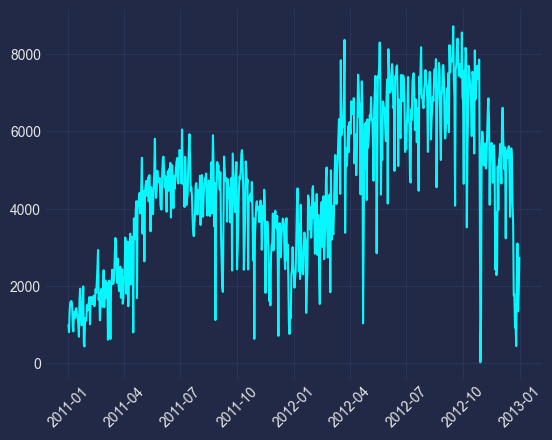

In [127]:
plt.xticks(rotation=45)
plt.plot(df_day['date'], df_day['cnt'])


In [128]:
grouped_season = df_day.groupby('season', as_index=False).agg({
    'cnt': 'sum'
})

<BarContainer object of 4 artists>

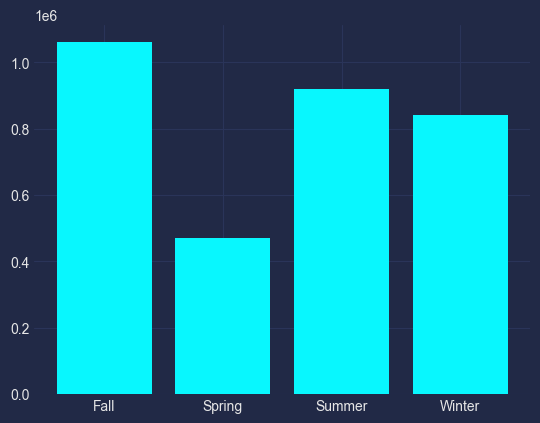

In [129]:
plt.bar(x=grouped_season['season'], height=grouped_season['cnt'])

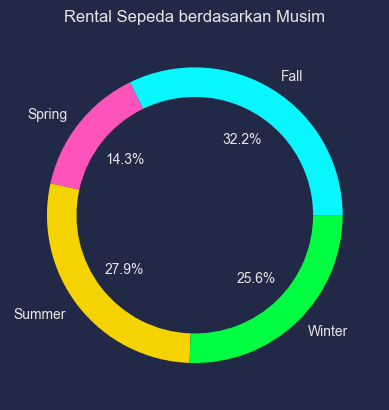

In [130]:
plt.pie(
    x=grouped_season['cnt'],
    labels=grouped_season['season'],
    autopct='%1.1f%%',
    wedgeprops = {'width': 0.2}
)
plt.title('Rental Sepeda berdasarkan Musim')
plt.show()



### Pertanyaan 3

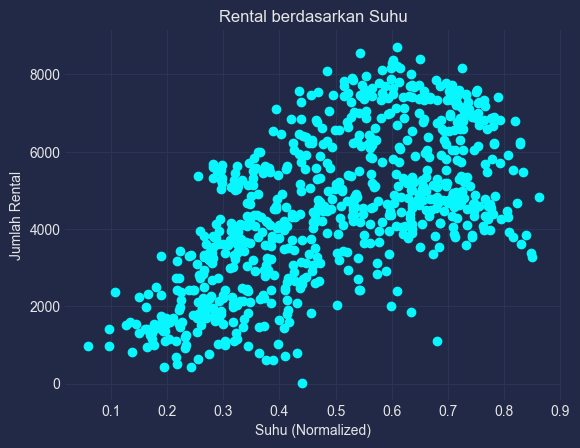

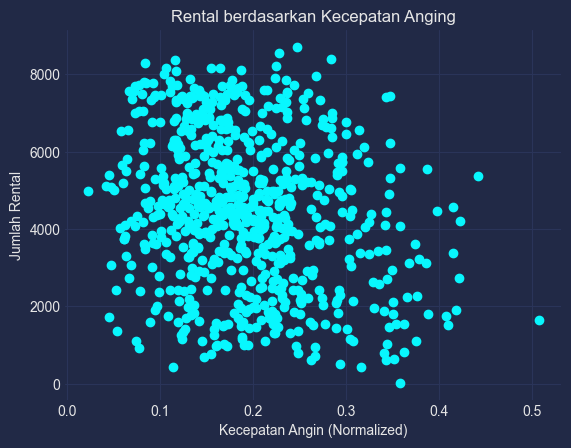

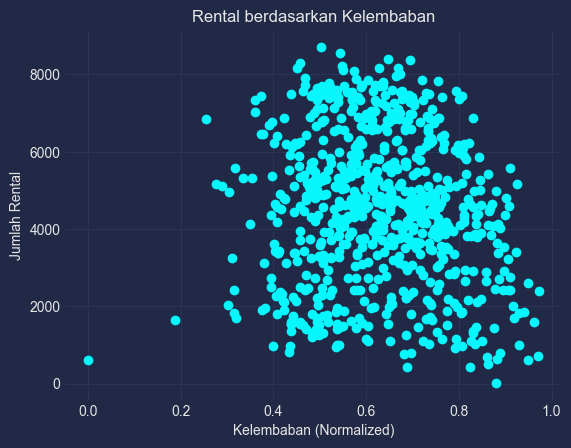

In [131]:
# Scatter Plot Untuk Suhu dan Rental Sepeda
plt.scatter(df_day['temp'], df_day['cnt'])
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Rental')
plt.title('Rental berdasarkan Suhu')
plt.show()

# Scatter Plot Untuk Kecepatan Angin dan Rental Sepeda
plt.scatter(df_day['windspeed'], df_day['cnt'])
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Jumlah Rental')
plt.title('Rental berdasarkan Kecepatan Anging')
plt.show()

# Scatter Plot Untuk Kelembabab dan Rental Sepeda
plt.scatter(df_day['hum'], df_day['cnt'])
plt.xlabel('Kelembaban (Normalized)')
plt.ylabel('Jumlah Rental')
plt.title('Rental berdasarkan Kelembaban')
plt.show()

## Conclusion

- **Conclusion 1** - 
Berdasarkan data yang telah dianalisis, rental sepeda paling banyak terjadi pada sore hari, khususnya pada jam 17:00. Pagi dan siang hari juga menjadi saat yang populer untuk rental sepeda, dengan puncak pertama pada jam 8:00 dan puncak kedua pada jam 12:00 - 13:00. Sedangkan rental sepeda paling sedikit terjadi pada tengah malam hari.
- **Conclusion 2** - Rental sepeda paling banyak dilakukan pada musim gugur, diikuti oleh musim panas, musim dinging, dan yang terakhir adalah musim semi. Perbedaan banyaknya sepeda yang di rental permusimnya ini dapat dipengaruhui oleh faktor cuaca, yang akan dijelaskan di kesimpulan ketiga.
- **Conclusion 3** - 
Cuaca mempengaruhi sepeda yang dirental dengan suhu tinggi dan kelembaban rendah yang meningkatkan jumlah rental, sementara kecepatan angin yang tinggi menurunkannya. 
    - **Suhu**: Suhu rata-rata tertinggi terjadi pada musim gugur (0.706309), yang mengakibatkan jumlah rental sepeda rata-rata tertinggi (5644.303191). Sedangkan suhu rata-rata terendah terjadi pada musim semi (0.297748), yang mengakibatkan jumlah rental sepeda rata-rata terendah (2604.132597).
    - **Kelembaban**: Kelembaban rata-rata yang tingi akan mempengaruhi jumlah sepeda yang dirental, namun tidak terlalu signifikan jika dibandingkan fengan suhu
    - **Kecepatan angin**: Kecepatan angin rata-rata tertinggi terjadi pada musim semi (0.214537), yang mengakibatkan jumlah rental sepeda rata-rata terendah (2604.132597). Sedangkan kecepatan angin rata-rata terendah terjadi pada musim gugur (0.172095), yang mengakibatkan jumlah rental sepeda rata-rata tertinggi (5644.303191).